In [76]:
import numpy as np
import matplotlib.pyplot as plt
import assimulo.problem as apro
import matplotlib.pyplot as mpl
import assimulo.solvers as asol

# Paramters for the elastic pendulum
m = 1.0      # mass
k = 10  # spring constant
L0 = 1.0     # natural length of the spring
g = 1.0     # acceleration due to gravity
simulation_time = 9.4
communication_points = 1000

def elastic_pendulum(t,y):
    yvec = np.zeros_like(y)
    yvec[0] = y[2]
    yvec[1] = y[3]
    lam = k * (np.sqrt(y[0]**2 + y[1]**2) - 1) / np.sqrt(y[0]**2 + y[1]**2)
    yvec[2] = -1*y[0]*lam
    yvec[3] = -1*y[1]*lam - 1
    return yvec

# Define Problem 
initial_conditions = [0.0, 1.1, 0.1, 0.0]  # initial position (x,y) and velocity (vx, vy)
eP_Problem = apro.Explicit_Problem(elastic_pendulum, t0 = 0, y0 = initial_conditions)
eP_Problem.name = r'Elastic Pendulum (m={m}, k={k}, L0={L0}, g={g})'
eP_Problem.name = eP_Problem.name.format(m=m, k=k, L0=L0, g=g)


CVode Solution

Final Run Statistics: Elastic Pendulum (m=1.0, k=10, L0=1.0, g=1.0) 

 Number of steps                                 : 246
 Number of function evaluations                  : 264
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jacobian eval.  : 20
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 261
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 9.4 seconds.
Elapsed simulation time: 0.010192549000294093 seconds.


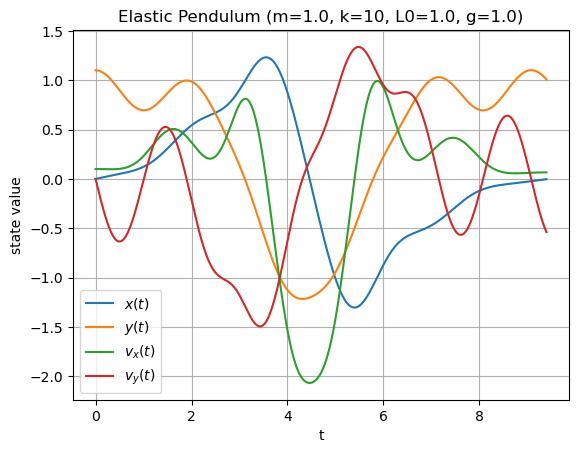

In [77]:
# CVode Solver
eP_Solver = asol.CVode(eP_Problem)
eP_Solver.reset() # Why is this needed here?
t_sol, x_sol = eP_Solver.simulate(simulation_time, 1000) # simulate(tf, ncp)
eP_Solver.reset()
# Plot Results
plt.figure()

plt.plot(t_sol, x_sol[:,0], label=r'$x(t)$')
plt.plot(t_sol, x_sol[:,1], label=r'$y(t)$')
plt.plot(t_sol, x_sol[:,2], label=r'$v_x(t)$')
plt.plot(t_sol, x_sol[:,3], label=r'$v_y(t)$')

plt.xlabel('t')
plt.ylabel('state value')
plt.legend()
plt.title(eP_Problem.name)
plt.grid(True)
plt.show()



BDF4 Solution

In [78]:
# Our Solution with BDF4
import BDF4Solver
exp_sim = BDF4Solver.BDF4(eP_Problem) #Create a BDF solver
exp_sim.reset()
print(exp_sim.maxsteps)
t, y = exp_sim.simulate(simulation_time)
# Plot Results
plt.figure()

plt.plot(t, y[:,0], label=r'$x(t)$')
plt.plot(t, y[:,1], label=r'$y(t)$')
plt.plot(t, y[:,2], label=r'$v_x(t)$')
plt.plot(t, y[:,3], label=r'$v_y(t)$')

plt.xlabel('t')
plt.ylabel('state value')
plt.legend()
plt.title("BDF4: " + eP_Problem.name)
plt.grid(True)
plt.show()



500


NameError: name 'Explicit_ODE_Exception' is not defined

BDF2 Solution

In [ ]:

import BDF2Solver 

exp_sim = BDF2Solver.BDF_2(eP_Problem) #Create a BDF solver
exp_sim.reset()
t, y = exp_sim.simulate(simulation_time, communication_points)
# Plot Results
plt.figure()

plt.plot(t, y[:,0], label=r'$x(t)$')
plt.plot(t, y[:,1], label=r'$y(t)$')
plt.plot(t, y[:,2], label=r'$v_x(t)$')
plt.plot(t, y[:,3], label=r'$v_y(t)$')

plt.xlabel('t')
plt.ylabel('state value')
plt.legend()
plt.title("BDF2: " + eP_Problem.name)
plt.grid(True)
plt.show()


NameError: name 'Explicit_ODE_Exception' is not defined

0.01
0.01
Final Run Statistics            : Elastic Pendulum (m=1.0, k=10, L0=1.0, g=1.0) 

 Step-length                    : 0.01 
 Number of Steps                : 401
 Number of Function Evaluations : 401

Solver options:

 Solver            : Explicit Euler
 Solver type       : Fixed step

Simulation interval    : 0.0 - 4.0 seconds.
Elapsed simulation time: 0.013950224999916827 seconds.


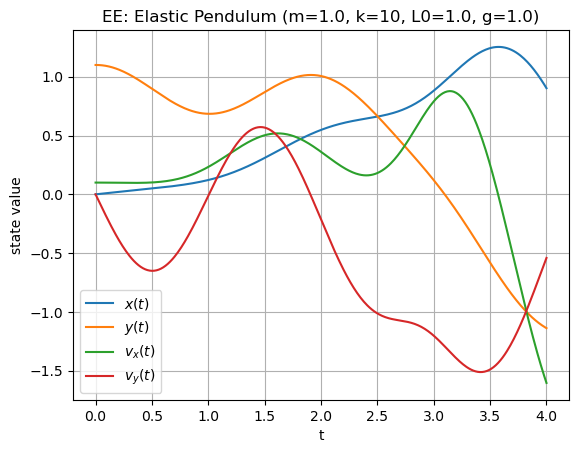

In [ ]:
import EESolver
exp_sim = EESolver.Explicit_Euler(eP_Problem) #Create a BDF solver
exp_sim.reset()
t, y = exp_sim.simulate(simulation_time, communication_points)

# Plot Results
plt.figure()

plt.plot(t, y[:,0], label=r'$x(t)$')
plt.plot(t, y[:,1], label=r'$y(t)$')
plt.plot(t, y[:,2], label=r'$v_x(t)$')
plt.plot(t, y[:,3], label=r'$v_y(t)$')

plt.xlabel('t')
plt.ylabel('state value')
plt.legend()
plt.title("EE: " + eP_Problem.name)
plt.grid(True)
plt.show()


Accuracy Testing

100
Final Run Statistics: --- 

 Number of steps                                 : 359
 Number of function evaluations                  : 389
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 386
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 4.9 seconds.
Elapsed simulation time: 0.019098993000170594 seconds.
0.01
0.01
Final Run Statistics            : --- 

 Step-length                    : 0.01 
 Number of Steps                : 491
 Number of Function Evaluations : 491

Solver options:

 Solver            : Explicit Euler
 Solver type       

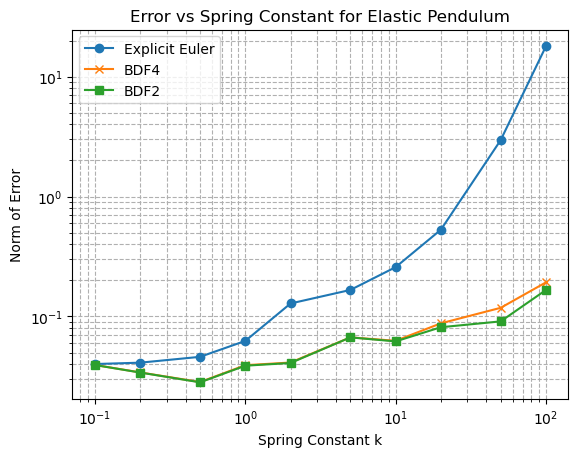

In [ ]:
# Define Problem 
initial_conditions = [0.0, 1.1, 0.1, 0.0]  # initial position (x,y) and velocity (vx, vy)
k_list = [100, 50, 20, 10, 5, 2, 1, 0.5, 0.2, 0.1]
EE_error_list = []
BDF4_error_list = []
BDF2_error_list = []
simulation_time = 4.9

for k in k_list:
    print(k)
    def elastic_pendulum(t,y):
        yvec = np.zeros_like(y)
        yvec[0] = y[2]
        yvec[1] = y[3]
        lam = k * (np.sqrt(y[0]**2 + y[1]**2) - 1) / np.sqrt(y[0]**2 + y[1]**2)
        yvec[2] = -1*y[0]*lam
        yvec[3] = -1*y[1]*lam - 1
        return yvec
    
    eP_kProblem = apro.Explicit_Problem(elastic_pendulum, t0 = 0, y0 = initial_conditions)
    
    eP_Solver = asol.CVode(eP_kProblem)
    eP_Solver.reset() # Why is this needed here?
    t_sol, y_sol = eP_Solver.simulate(simulation_time, 491) # simulate(tf, ncp)

    # EE Solver
    exp_sim = EESolver.Explicit_Euler(eP_kProblem) #Create a BDF solver
    exp_sim.reset()
    t, y = exp_sim.simulate(simulation_time, 1000)
    error = np.linalg.norm(y_sol - y, ord=np.inf)
    EE_error_list.append(error)

    # BDF4 Solver
    exp_sim = BDF4Solver.BDF4(eP_kProblem) #Create a BDF solver
    exp_sim.reset()
    t, y = exp_sim.simulate(simulation_time, 1000)
    error = np.linalg.norm(y_sol - y, ord=np.inf)
    BDF4_error_list.append(error)

    # BDF2 Solver
    exp_sim = BDF2Solver.BDF_2(eP_kProblem) #Create a BDF solver
    exp_sim.reset()
    t, y = exp_sim.simulate(simulation_time, 1000)
    error = np.linalg.norm(y_sol - y, ord=np.inf)
    BDF2_error_list.append(error)
    


plt.figure()

plt.loglog(k_list, EE_error_list, marker='o', label='Explicit Euler')
plt.loglog(k_list, BDF4_error_list, marker='x', label='BDF4')
plt.loglog(k_list, BDF2_error_list, marker='s', label='BDF2')

plt.xlabel('Spring Constant k')
plt.ylabel('Norm of Error')
plt.title('Error vs Spring Constant for Elastic Pendulum')
plt.grid(True, which="both", ls="--")
plt.legend()   # <- this shows which curve is which
plt.show()


Stability Evaluation

In [85]:

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

k_list = [100]
h_list = [0.1,0.01, 0.001]
EE_error_list = []
BDF4_error_list = []
BDF2_error_list = []
simulation_time = 4.9

def k_dependent_pendulum(t, y, k):
    yvec = np.zeros_like(y)
    yvec[0] = y[2]
    yvec[1] = y[3]
    r = np.sqrt(y[0]**2 + y[1]**2)
    lam = k * (r - 1) / r
    yvec[2] = -y[0] * lam
    yvec[3] = -y[1] * lam - 1
    return yvec

from scipy.interpolate import interp1d

for k in k_list:
    EE_errors_for_k = []
    BDF4_errors_for_k = []
    BDF2_errors_for_k = []

    def k_dependent_pendulum_k(t, y):
        return k_dependent_pendulum(t, y, k)

    # Reference solution with fine steps
    eP_Problem = apro.Explicit_Problem(k_dependent_pendulum_k, t0=0, y0=initial_conditions)
    eP_Solver = asol.CVode(eP_Problem)
    eP_Solver.reset()
    t_sol, y_sol = eP_Solver.simulate(simulation_time, 10000)  # fine reference

    # Interpolation functions for each component
    y_interp_funcs = [interp1d(t_sol, y_sol[:, i], kind='cubic') for i in range(y_sol.shape[1])]

    for h in h_list:
        n_steps = ceil(simulation_time / h)

        # EE Solver
        ee_solver = EESolver.Explicit_Euler(eP_Problem)
        ee_solver._set_h(h)
        ee_solver.reset()
        t, y = ee_solver.simulate(simulation_time, n_steps)

        # Interpolate reference solution at solver's time points
        y_ref = np.column_stack([f(t) for f in y_interp_funcs])
        EE_errors_for_k.append(np.linalg.norm(y_ref - y, ord=np.inf))

        # BDF4 Solver
        bdf4_solver = BDF4Solver.BDF4(eP_Problem)
        bdf4_solver._set_h(h)
        bdf4_solver.reset()
        t, y = bdf4_solver.simulate(simulation_time, n_steps)
        y_ref = np.column_stack([f(t) for f in y_interp_funcs])
        BDF4_errors_for_k.append(np.linalg.norm(y_ref - y, ord=np.inf))

        # BDF2 Solver
        bdf2_solver = BDF2Solver.BDF_2(eP_Problem)
        bdf2_solver._set_h(h)
        bdf2_solver.reset()
        t, y = bdf2_solver.simulate(simulation_time, n_steps)
        y_ref = np.column_stack([f(t) for f in y_interp_funcs])
        BDF2_errors_for_k.append(np.linalg.norm(y_ref - y, ord=np.inf))

    EE_error_list.append(EE_errors_for_k)
    BDF4_error_list.append(BDF4_errors_for_k)
    BDF2_error_list.append(BDF2_errors_for_k)
# Plotting the errors

for i, h in enumerate(h_list):
    plt.figure()
    plt.loglog(k_list, [EE_error_list[j][i] for j in range(len(k_list))], marker='o', label='EE')
    plt.loglog(k_list, [BDF4_error_list[j][i] for j in range(len(k_list))], marker='x', label='BDF4')
    plt.loglog(k_list, [BDF2_error_list[j][i] for j in range(len(k_list))], marker='s', label='BDF2')
    plt.xlabel('Spring Constant k')
    plt.ylabel('Infinity Norm of Error')
    plt.title(f'Elastic Pendulum Error vs k (h = {h})')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

import numpy as np
import matplotlib.pyplot as plt
from math import ceil

EE_error_list = []
BDF4_error_list = []
BDF2_error_list = []

def k_dependent_pendulum(t, y, k):
    yvec = np.zeros_like(y)
    yvec[0] = y[2]
    yvec[1] = y[3]
    r = np.sqrt(y[0]**2 + y[1]**2)
    lam = k * (r - 1) / r
    yvec[2] = -y[0] * lam
    yvec[3] = -y[1] * lam - 1
    return yvec

from scipy.interpolate import interp1d

for k in k_list:
    EE_errors_for_k = []
    BDF4_errors_for_k = []
    BDF2_errors_for_k = []

    def k_dependent_pendulum_k(t, y):
        return k_dependent_pendulum(t, y, k)

    # Reference solution with fine steps
    eP_Problem = apro.Explicit_Problem(k_dependent_pendulum_k, t0=0, y0=initial_conditions)
    eP_Solver = asol.CVode(eP_Problem)
    eP_Solver.reset()
    t_sol, y_sol = eP_Solver.simulate(simulation_time, 10000)  # fine reference

    # Interpolation functions for each component
    y_interp_funcs = [interp1d(t_sol, y_sol[:, i], kind='cubic') for i in range(y_sol.shape[1])]

    for h in h_list:
        n_steps = ceil(simulation_time / h)

        # EE Solver
        ee_solver = EESolver.Explicit_Euler(eP_Problem)
        ee_solver._set_h(h)
        ee_solver.reset()
        t, y = ee_solver.simulate(simulation_time, n_steps)

        # Interpolate reference solution at solver's time points
        y_ref = np.column_stack([f(t) for f in y_interp_funcs])
        EE_errors_for_k.append(np.linalg.norm(y_ref - y, ord=np.inf))

        # BDF4 Solver
        bdf4_solver = BDF4Solver.BDF4(eP_Problem)
        bdf4_solver._set_h(h)
        bdf4_solver.reset()
        t, y = bdf4_solver.simulate(simulation_time, n_steps)
        y_ref = np.column_stack([f(t) for f in y_interp_funcs])
        BDF4_errors_for_k.append(np.linalg.norm(y_ref - y, ord=np.inf))

        # BDF2 Solver
        bdf2_solver = BDF2Solver.BDF_2(eP_Problem)
        bdf2_solver._set_h(h)
        bdf2_solver.reset()
        t, y = bdf2_solver.simulate(simulation_time, n_steps)
        y_ref = np.column_stack([f(t) for f in y_interp_funcs])
        BDF2_errors_for_k.append(np.linalg.norm(y_ref - y, ord=np.inf))

    EE_error_list.append(EE_errors_for_k)
    BDF4_error_list.append(BDF4_errors_for_k)
    BDF2_error_list.append(BDF2_errors_for_k)
# Plotting the errors

print(h_list)
for i, h in enumerate(h_list):
    plt.figure()
    plt.loglog(k_list, [EE_error_list[j][i] for j in range(len(k_list))], marker='o', label='EE')
    plt.loglog(k_list, [BDF4_error_list[j][i] for j in range(len(k_list))], marker='x', label='BDF4')
    plt.loglog(k_list, [BDF2_error_list[j][i] for j in range(len(k_list))], marker='s', label='BDF2')
    plt.xlabel('Spring Constant k')
    plt.ylabel('Infinity Norm of Error')
    plt.title(f'Elastic Pendulum Error vs k (h = {h})')
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()


Final Run Statistics: --- 

 Number of steps                                 : 357
 Number of function evaluations                  : 388
 Number of Jacobian evaluations                  : 6
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 0
 Number of nonlinear iterations                  : 385
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : BDF
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 5
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-06

Simulation interval    : 0.0 - 4.9 seconds.
Elapsed simulation time: 0.051601019999907294 seconds.
0.01
0.1
Final Run Statistics            : --- 

 Step-length                    : 0.1 
 Number of Steps                : 50
 Number of Function Evaluations : 50

Solver options:

 Solver            : Explicit Euler
 Solver type       : Fixed 

NameError: name 'Explicit_ODE_Exception' is not defined